In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from numpy.random import RandomState
from src.utils.path_getter import PathGetter

from src.extraction.jsonl_data_reader import JsonlDataReader

In [2]:
seed = 7
random_state = RandomState(seed=seed)
np.random.seed(seed)

In [28]:
train_data = JsonlDataReader(file_name='train.jsonl').read()
test_data = JsonlDataReader(file_name='test.jsonl').read()

In [31]:
from difflib import SequenceMatcher
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()


In [5]:
mini_instance = train_data.raw_instances[:10]

In [6]:
from tqdm import tqdm

text_similarities = []
for idx, row in tqdm(enumerate(train_data.raw_instances[:-1])):
    for next_idx, next_row in enumerate(train_data.raw_instances[idx+1:]):
        similarity = similar(row.string, next_row.string)
        next_row_index = idx + 1 + next_idx
        text_similarities.append([idx, next_row_index, similarity])
similiarity_df = pd.DataFrame(text_similarities, columns=['index1', 'index2', 'similarity'])
similiarity_df

8242it [6:26:22,  2.81s/it]


,index1,index2,similarity
0,0,1,0.023346
1,0,2,0.029466
2,0,3,0.023372
3,0,4,0.034707
4,0,5,0.036364
...,...,...,...
33969398,8239,8241,0.024096
33969399,8239,8242,0.034161
33969400,8240,8241,0.024691
33969401,8240,8242,0.038627


In [7]:
# similiarity_df.to_csv(PathGetter.get_data_directory()/'similiarity.csv', index=True)

In [23]:
# similarity_df.to_parquet(PathGetter.get_data_directory()/'similarity_df.parquet', index=False)

In [21]:
# similarity_df = pd.read_csv(PathGetter.get_data_directory()/'similiarity.csv', index_col=0)

In [24]:
similarity_df = pd.read_parquet(PathGetter.get_data_directory()/'similarity_df.parquet')

In [25]:
similarity_df

,index1,index2,similarity
0,0,1,0.023346
1,0,2,0.029466
2,0,3,0.023372
3,0,4,0.034707
4,0,5,0.036364
...,...,...,...
33969398,8239,8241,0.024096
33969399,8239,8242,0.034161
33969400,8240,8241,0.024691
33969401,8240,8242,0.038627


(array([3.055529e+06, 7.069985e+06, 4.184479e+06, 1.865562e+06,
        9.478550e+05, 6.815400e+05, 7.609150e+05, 1.035114e+06,
        1.428939e+06, 1.787276e+06, 2.124359e+06, 2.183302e+06,
        2.068625e+06, 1.718563e+06, 1.270563e+06, 8.397450e+05,
        4.902580e+05, 2.513430e+05, 1.181500e+05, 4.970700e+04,
        2.213900e+04, 8.513000e+03, 3.459000e+03, 1.464000e+03,
        6.220000e+02, 3.220000e+02, 1.390000e+02, 1.050000e+02,
        4.800000e+01, 3.600000e+01, 3.200000e+01, 2.100000e+01,
        2.800000e+01, 2.500000e+01, 3.400000e+01, 2.400000e+01,
        2.200000e+01, 3.300000e+01, 1.600000e+01, 2.100000e+01,
        3.500000e+01, 2.600000e+01, 3.400000e+01, 2.800000e+01,
        3.300000e+01, 4.000000e+01, 2.900000e+01, 4.100000e+01,
        5.600000e+01, 1.690000e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.

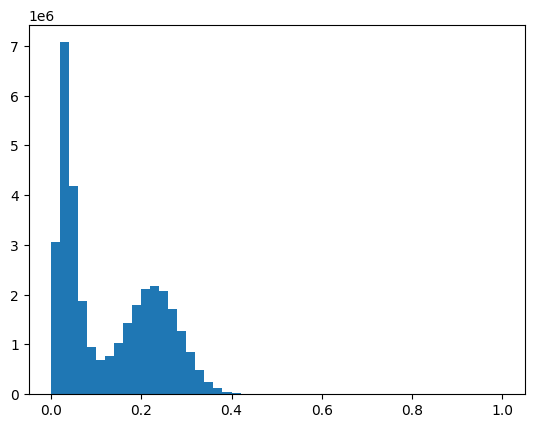

In [26]:
import matplotlib.pyplot as plt

plt.hist(similarity_df['similarity'], bins=50)

In [27]:
filtered_dupes = similarity_df[(similarity_df['similarity']>0.6)]
filtered_dupes

,index1,index2,similarity
32533,3,7814,0.882006
91765,11,1170,0.601064
98414,11,7819,0.628788
167833,20,3204,0.654545
259917,31,4912,0.994382
...,...,...,...
33733361,7555,7842,0.988304
33794173,7650,7949,0.967033
33823312,7701,8222,0.972477
33873149,7803,8130,0.990704


In [15]:
for row in filtered_dupes.head(20).itertuples():
    print(row.index1, row.index2)
    print(train_data.texts[row.index1])
    print(train_data.texts[row.index2])

11 1118
DOI: 10.7554/eLife.08828 1 of 27
mitochondrial division (Friedman et al., 2011; Korobova et al., 2013; Murley et al., 2013; Korobova et al., 2014).
As such, the analysis of aDNA has been greatly enabled by NGS (Green et al. 2010; Krause et al. 2010; Rasmussen et al. 2010; Meyer et al. 2012).
11 2941
DOI: 10.7554/eLife.08828 1 of 27
mitochondrial division (Friedman et al., 2011; Korobova et al., 2013; Murley et al., 2013; Korobova et al., 2014).
Such complex
mixtures are commonly investigated in metabolomics studies (Saric et al., 2008; Le Gall et al., 2011; Marcobal et al., 2013; Weir et al., 2013; Walker et al., 2014).
11 7750
DOI: 10.7554/eLife.08828 1 of 27
mitochondrial division (Friedman et al., 2011; Korobova et al., 2013; Murley et al., 2013; Korobova et al., 2014).
DOI: 10.7554/eLife.08828 14 of 27
mitochondria (Friedman et al., 2011; Murley et al., 2013), with the ER providing a platform for actin polymerization mediated by the ER-anchored formin INF2 (Korobova et al.,

In [29]:
from src.preprocessing.simple_preprocessor import SimplePreprocessor

docs_without_citation = SimplePreprocessor().preprocess(train_data)


In [48]:
train_data.texts[:2]

['However, how frataxin interacts with the Fe-S cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported (IscS [12,22], IscU/Isu1 [6,11,16] or ISD11/Isd11 [14,15]).',
 'In the study by Hickey et al. (2012), spikes were sampled from the field at the point of physiological\nrobinson et al.: genomic regions influencing root traits in barley 11 of 13\nmaturity, dried, grain threshed by hand, and stored at −20C to preserve grain dormancy before germination testing.']

In [30]:
docs_without_citation.texts[:2]

['However, how frataxin interacts with the Fe-S cluster biosynthesis components remains unclear as direct one-to-one interactions with each component were reported (IscS , IscU/Isu1 [6,11,16] or ISD11/Isd11 [14,15]).',
 'In the study by , spikes were sampled from the field at the point of physiological\nrobinson et al.: genomic regions influencing root traits in barley 11 of 13\nmaturity, dried, grain threshed by hand, and stored at −20C to preserve grain dormancy before germination testing.']

In [32]:
cleaned_similarities = dict()
cleaned_texts = docs_without_citation.texts
for row in filtered_dupes.itertuples():
    cleaned_similarity = similar(cleaned_texts[row.index1], cleaned_texts[row.index2])
    cleaned_similarities[row.Index] = cleaned_similarity

In [34]:
similarity_df.loc[:, 'similarity_without_cite'] = similarity_df.index.map(cleaned_similarities)
similarity_df

,index1,index2,similarity,similarity_without_cite
0,0,1,0.023346,NaN
1,0,2,0.029466,NaN
2,0,3,0.023372,NaN
3,0,4,0.034707,NaN
4,0,5,0.036364,NaN
...,...,...,...,...
33969398,8239,8241,0.024096,NaN
33969399,8239,8242,0.034161,NaN
33969400,8240,8241,0.024691,NaN
33969401,8240,8242,0.038627,NaN


In [43]:
cleaned_filtered_data = similarity_df[(similarity_df['similarity'] > 0.6) ]
cleaned_filtered_data.shape

(746, 4)

(array([ 8.,  8.,  2.,  4.,  0.,  0.,  2.,  2.,  2.,  1.,  1.,  3.,  1.,
         4.,  5.,  4.,  4.,  5.,  3.,  7.,  2., 11., 10.,  9.,  6., 16.,
         7., 21., 14., 33., 26., 26., 25., 34., 21., 23., 13., 19., 21.,
        21., 27., 20., 25., 21., 24., 19., 26., 21., 43., 96.]),
 array([0.00402414, 0.02394366, 0.04386318, 0.0637827 , 0.08370221,
        0.10362173, 0.12354125, 0.14346076, 0.16338028, 0.1832998 ,
        0.20321932, 0.22313883, 0.24305835, 0.26297787, 0.28289738,
        0.3028169 , 0.32273642, 0.34265594, 0.36257545, 0.38249497,
        0.40241449, 0.422334  , 0.44225352, 0.46217304, 0.48209256,
        0.50201207, 0.52193159, 0.54185111, 0.56177062, 0.58169014,
        0.60160966, 0.62152918, 0.64144869, 0.66136821, 0.68128773,
        0.70120724, 0.72112676, 0.74104628, 0.76096579, 0.78088531,
        0.80080483, 0.82072435, 0.84064386, 0.86056338, 0.8804829 ,
        0.90040241, 0.92032193, 0.94024145, 0.96016097, 0.98008048,
        1.        ]),
 <BarContainer

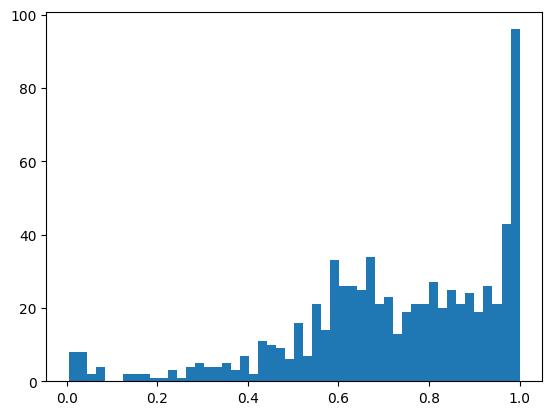

In [36]:

import matplotlib.pyplot as plt

plt.hist(similarity_df['similarity_without_cite'], bins=50)

In [ ]:
cleaned_filtered_data.loc

In [44]:
low_similarity_data = cleaned_filtered_data[cleaned_filtered_data['similarity_without_cite'] < 0.3]
low_similarity_data

,index1,index2,similarity,similarity_without_cite
1194226,146,1626,0.800582,0.201893
1270808,155,5389,0.906542,0.020576
2979274,369,6242,0.878444,0.283088
3037986,377,2006,0.907121,0.062992
3141789,390,3655,0.774536,0.130631
5365844,678,7950,0.630508,0.041322
7179791,922,6171,0.840116,0.295276
7846307,1014,3525,0.976909,0.004115
7940657,1027,4002,0.935961,0.296296
8550682,1112,4407,0.764706,0.229885


In [47]:
cleaned_texts = docs_without_citation.texts
for row in low_similarity_data.itertuples():
    print(row.index1, row.index2, row.similarity, row.similarity_without_cite)
    print(cleaned_texts[row.index1])
    print(cleaned_texts[row.index2])

146 1626 0.8005822416302766 0.20189274447949526
The high numbers of all three species found in MT confirm the importance of this large, lowland forest block for primate conservation and further support the proposal to restore the Mngeta conservation corridor between US and Iyondo forest, a lowland to montane forest that is contiguous with MT  and is currently under gazettement as forest reserve (N.
…primate conservation and further support the proposal to restore the Mngeta conservation corridor between US and Iyondo forest, a lowland to montane forest that is contiguous with MT (; St. John 2008) and is currently under gazettement as forest reserve (N. Burgess, pers. comm.).
155 5389 0.9065420560747663 0.0205761316872428
In mitochondria LDH and glycerol-3-phosphate dehydrogenase do not donate electrons to the respiratory chain, yet in bacteria they are membrane-bound enzymes transferring their electrons directly to ubiquinol .
…do not donate electrons to the respiratory chain, yet in b